In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
df_transaction = pd.read_excel("dataset/Transaction.xlsx")
df_user = pd.read_excel("dataset/User.xlsx")
df_city = pd.read_excel("dataset/City.xlsx")
df_country = pd.read_excel("dataset/Country.xlsx")
df_region = pd.read_excel("dataset/Region.xlsx")
df_continent = pd.read_excel("dataset/Continent.xlsx")
df_item = pd.read_excel("dataset/Updated_Item.xlsx")
df_type = pd.read_excel("dataset/Type.xlsx")
df_mode = pd.read_excel("dataset/Mode.xlsx")

In [2]:
df_transaction.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating
0,3,70456,2022,10,2,640,5
1,8,7567,2022,10,4,640,5
2,9,79069,2022,10,3,640,5
3,10,31019,2022,10,3,640,3
4,15,43611,2022,10,2,640,3


In [3]:
print("Check For Missing Values In Transaction")
print(df_transaction.isna().sum())
# Date - Combine to datetime
df_transaction['VisitDate'] = pd.to_datetime(df_transaction['VisitYear'].astype(str) + '-' + df_transaction['VisitMonth'].astype(str) + '-01')

Check For Missing Values In Transaction
TransactionId    0
UserId           0
VisitYear        0
VisitMonth       0
VisitMode        0
AttractionId     0
Rating           0
dtype: int64


In [4]:
# Remove invalid ratings
df_transaction = df_transaction[(df_transaction['Rating'] >= 1) & (df_transaction['Rating'] <= 5)]
# Drop Duplicates
df_transaction.drop_duplicates(inplace=True)
print("Unique Visit Modes:", df_transaction['VisitMode'].unique())

Unique Visit Modes: [2 4 3 5 1]


In [5]:
df_transaction.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,VisitDate
0,3,70456,2022,10,2,640,5,2022-10-01
1,8,7567,2022,10,4,640,5,2022-10-01
2,9,79069,2022,10,3,640,5,2022-10-01
3,10,31019,2022,10,3,640,3,2022-10-01
4,15,43611,2022,10,2,640,3,2022-10-01


In [6]:
df_user.head()

,UserId,ContinentId,RegionId,CountryId,CityId
0,14,5,20,155,220.0
1,16,3,14,101,3098.0
2,20,4,15,109,4303.0
3,23,1,4,22,154.0
4,25,3,14,101,3098.0


In [7]:
df_user.dtypes

UserId           int64
ContinentId      int64
RegionId         int64
CountryId        int64
CityId         float64
dtype: object

In [8]:
print("Shape Of User Dataset:", df_user.shape)
print("Check For Missing Values In User")
df_user.isna().sum()

Shape Of User Dataset: (33530, 5)
Check For Missing Values In User


UserId         0
ContinentId    0
RegionId       0
CountryId      0
CityId         4
dtype: int64

In [9]:
df_user = df_user.dropna()
print("Shape Of User Dataset:", df_user.shape)
print("Check For Missing Values In User")
df_user.isna().sum()

Shape Of User Dataset: (33526, 5)
Check For Missing Values In User


UserId         0
ContinentId    0
RegionId       0
CountryId      0
CityId         0
dtype: int64

In [10]:
print("Duplicate rows in df_user:", df_user.duplicated().sum())
df_user.drop_duplicates(inplace=True)

Duplicate rows in df_user: 0


In [11]:
df_city.head(10)

,CityId,CityName,CountryId
0,0,-,0
1,1,Douala,1
2,2,South Region,1
3,3,N'Djamena,2
4,4,Kigali,3
5,5,Kigali Province,3
6,6,Addis Ababa,4
7,7,Karen,5
8,8,Kenya,5
9,9,Malindi,5


In [12]:
print("Shape Of City Dataset:", df_city.shape)
print("Check For Missing Values In City")
df_city.isna().sum()

Shape Of City Dataset: (9143, 3)
Check For Missing Values In City


CityId       0
CityName     1
CountryId    0
dtype: int64

In [13]:
df_city = df_city.dropna()
print("Shape Of City Dataset:", df_city.shape)
print("Check For Missing Values In City")
df_city.isna().sum()

Shape Of City Dataset: (9142, 3)
Check For Missing Values In City


CityId       0
CityName     0
CountryId    0
dtype: int64

In [14]:
# Resolve Discrepancies in City Names
df_city['CityName'] = df_city['CityName'].str.strip().str.lower()
df_city.head()

,CityId,CityName,CountryId
0,0,-,0
1,1,douala,1
2,2,south region,1
3,3,n'djamena,2
4,4,kigali,3


In [15]:
# CityName = '-' → this is a placeholder or invalid value
# CountryId = 0 → likely invalid, as most countries start from 1
df_city = df_city[df_city['CityName'] != '-']
df_city = df_city[df_city['CountryId'] != 0]
df_city.head()

,CityId,CityName,CountryId
1,1,douala,1
2,2,south region,1
3,3,n'djamena,2
4,4,kigali,3
5,5,kigali province,3


In [16]:
df_country.head()

,CountryId,Country,RegionId
0,0,-,0
1,1,Cameroon,1
2,2,Chad,1
3,3,Rwanda,1
4,4,Ethiopia,2


In [17]:
print("Shape Of Country Dataset:", df_country.shape)
print("Check For Missing Values In Country")
df_country.isna().sum()

Shape Of Country Dataset: (165, 3)
Check For Missing Values In Country


CountryId    0
Country      0
RegionId     0
dtype: int64

In [18]:
# Remove rows with placeholder vaalues
df_country = df_country[df_country['Country'] != '-']
df_country = df_country[df_country['CountryId'] != 0]
df_country = df_country[df_country['RegionId'] != 0]
df_country.head()

,CountryId,Country,RegionId
1,1,Cameroon,1
2,2,Chad,1
3,3,Rwanda,1
4,4,Ethiopia,2
5,5,Kenya,2


In [19]:
# Resolve Discrepancies in Country Names
df_country['Country'] = df_country['Country'].str.strip().str.lower()

In [20]:
df_region.head(10)

,Region,RegionId,ContinentId
0,-,0,0
1,Central Africa,1,1
2,East Africa,2,1
3,North Africa,3,1
4,Southern Africa,4,1
5,West Africa,5,1
6,Caribbean,6,2
7,Central America,7,2
8,Northern America,8,2
9,South America,9,2


In [21]:
print("Shape Of Region Dataset:", df_region.shape)
print("Check For Missing Values In Region")
df_region.isna().sum()

Shape Of Region Dataset: (22, 3)
Check For Missing Values In Region


Region         0
RegionId       0
ContinentId    0
dtype: int64

In [22]:
# Remove rows with placeholder vaalues
df_region = df_region[df_region['Region'] != '-']
df_region = df_region[df_region['ContinentId'] != 0]
df_region = df_region[df_region['RegionId'] != 0]
# Resolve Discrepancies in Region Names
df_region['Region'] = df_region['Region'].str.strip().str.lower()
df_region.head()

,Region,RegionId,ContinentId
1,central africa,1,1
2,east africa,2,1
3,north africa,3,1
4,southern africa,4,1
5,west africa,5,1


In [23]:
print("Shape Of Continent Dataset:", df_continent.shape)
print("Check For Missing Values In Continent")
df_continent.isna().sum()

Shape Of Continent Dataset: (6, 2)
Check For Missing Values In Continent


ContinentId    0
Continent      0
dtype: int64

In [24]:
df_continent.head()

,ContinentId,Continent
0,0,-
1,1,Africa
2,2,America
3,3,Asia
4,4,Australia & Oceania


In [25]:
# Remove rows with placeholder vaalues
df_continent = df_continent[df_continent['ContinentId'] != 0]
df_continent = df_continent[df_continent['Continent'] != '-']
df_continent.head()

,ContinentId,Continent
1,1,Africa
2,2,America
3,3,Asia
4,4,Australia & Oceania
5,5,Europe


In [26]:
print("Shape Of item Dataset:", df_item.shape)
print("Check For Missing Values In Item")
df_item.isna().sum()

Shape Of item Dataset: (1698, 5)
Check For Missing Values In Item


AttractionId         0
AttractionCityId     0
AttractionTypeId     0
Attraction           0
AttractionAddress    0
dtype: int64

In [27]:
df_item.head()

,AttractionId,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress
0,369,1,13,Kuta Beach - Bali,Kuta
1,481,1,13,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia"
2,640,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia"
3,650,1,13,Sanur Beach,Sanur
4,673,1,13,Seminyak Beach,Seminyak


In [28]:
print("Shape Of type Dataset:", df_type.shape)
print("Check For Missing Values In type")
df_type.isna().sum()

Shape Of type Dataset: (17, 2)
Check For Missing Values In type


AttractionTypeId    0
AttractionType      0
dtype: int64

In [29]:
df_type.head()

,AttractionTypeId,AttractionType
0,2,Ancient Ruins
1,10,Ballets
2,13,Beaches
3,19,Caverns & Caves
4,34,Flea & Street Markets


In [30]:
print("Shape Of mode Dataset:", df_mode.shape)
print("Check For Missing Values In mode")
df_mode.isna().sum()

Shape Of mode Dataset: (6, 2)
Check For Missing Values In mode


VisitModeId    0
VisitMode      0
dtype: int64

In [31]:
df_mode.head()

,VisitModeId,VisitMode
0,0,-
1,1,Business
2,2,Couples
3,3,Family
4,4,Friends


In [32]:
# Remove rows with placeholder vaalues
df_mode = df_mode[df_mode['VisitMode'] != '-']
df_mode = df_mode[df_mode['VisitModeId'] != 0]
# Resolve Discrepancies in mode Names
df_mode['VisitMode'] = df_mode['VisitMode'].str.strip().str.lower()
df_mode.head()

,VisitModeId,VisitMode
1,1,business
2,2,couples
3,3,family
4,4,friends
5,5,solo


In [33]:
# ------------------ Setup: Clean column names ------------------

def clean_columns(df):
    df.columns = df.columns.str.strip()
    return df

# Apply column cleaning
df_item = clean_columns(df_item)
df_type = clean_columns(df_type)
df_city = clean_columns(df_city)
df_country = clean_columns(df_country)
df_region = clean_columns(df_region)
df_continent = clean_columns(df_continent)
df_user = clean_columns(df_user)
df_transaction = clean_columns(df_transaction)
df_mode = clean_columns(df_mode)


In [34]:
print(df_item['AttractionTypeId'].unique())
print("**************************************************************************")
print(df_type['AttractionTypeId'].unique())
print("**************************************************************************")
print(df_type['AttractionType'].unique())

[13 63 76 72 93 92 61 64 82 91 84 19 34 10 2 45 44 'Temple' 'Beach' 'Park'
 'Museum' 'Market']
**************************************************************************
[ 2 10 13 19 34 44 45 61 63 64 72 76 82 84 91 92 93]
**************************************************************************
['Ancient Ruins' 'Ballets' 'Beaches' 'Caverns & Caves'
 'Flea & Street Markets' 'Historic Sites' 'History Museums'
 'National Parks' 'Nature & Wildlife Areas' 'Neighborhoods'
 'Points of Interest & Landmarks' 'Religious Sites' 'Spas'
 'Speciality Museums' 'Volcanos' 'Water Parks' 'Waterfalls']


In [35]:
type_mapping = df_type.set_index('AttractionType')['AttractionTypeId'].to_dict()
type_mapping 

{'Ancient Ruins': 2,
 'Ballets': 10,
 'Beaches': 13,
 'Caverns & Caves': 19,
 'Flea & Street Markets': 34,
 'Historic Sites': 44,
 'History Museums': 45,
 'National Parks': 61,
 'Nature & Wildlife Areas': 63,
 'Neighborhoods': 64,
 'Points of Interest & Landmarks': 72,
 'Religious Sites': 76,
 'Spas': 82,
 'Speciality Museums': 84,
 'Volcanos': 91,
 'Water Parks': 92,
 'Waterfalls': 93}

In [36]:
# Custom mapping from string to correct ID
type_mapping = {
    'Temple': 76,
    'Market': 34,
    'Park': 61,
    'Beach': 13,
    'Museum': 45,
    # Add others...
}

# Ensure the column is string for safe replacement
df_item['AttractionTypeId'] = df_item['AttractionTypeId'].astype(str)
# Apply replacement
df_item['AttractionTypeId'] = df_item['AttractionTypeId'].replace(type_mapping)
# Convert back to int safely
df_item['AttractionTypeId'] = df_item['AttractionTypeId'].astype(int)
# print(df_item['AttractionTypeId'].unique())


In [37]:
# Drop City-related duplicates before merging with city
cols_to_drop = ['CityId', 'CityName', 'CountryId']
df_item = df_item.drop(columns=[col for col in cols_to_drop if col in df_item.columns])
df_item.head()

,AttractionId,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress
0,369,1,13,Kuta Beach - Bali,Kuta
1,481,1,13,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia"
2,640,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia"
3,650,1,13,Sanur Beach,Sanur
4,673,1,13,Seminyak Beach,Seminyak


In [38]:
# ------------------ Merge User Demographics ------------------

# Drop CountryId from df_user if already present
if 'CountryId' in df_user.columns:
    df_user = df_user.drop(columns=['CountryId'])

df_user.head()

,UserId,ContinentId,RegionId,CityId
0,14,5,20,220.0
1,16,3,14,3098.0
2,20,4,15,4303.0
3,23,1,4,154.0
4,25,3,14,3098.0


In [39]:
# Merge city to get CountryId
df_user = df_user.merge(df_city, on='CityId', how='left')
df_user.head()

,UserId,ContinentId,RegionId,CityId,CityName,CountryId
0,14,5,20,220.0,lagos,27
1,16,3,14,3098.0,jakarta,101
2,20,4,15,4303.0,gold coast,109
3,23,1,4,154.0,meyerton,22
4,25,3,14,3098.0,jakarta,101


In [40]:
df_country.head()

,CountryId,Country,RegionId
1,1,cameroon,1
2,2,chad,1
3,3,rwanda,1
4,4,ethiopia,2
5,5,kenya,2


In [41]:
# Drop existing RegionId to avoid duplicate issues
if 'RegionId' in df_user.columns:
    df_user.drop('RegionId', axis=1, inplace=True)

# Merge with country to get RegionId
df_user = df_user.merge(df_country, on='CountryId', how='left')
df_user.head()

,UserId,ContinentId,CityId,CityName,CountryId,Country,RegionId
0,14,5,220.0,lagos,27,nigeria,5.0
1,16,3,3098.0,jakarta,101,indonesia,14.0
2,20,4,4303.0,gold coast,109,australia,15.0
3,23,1,154.0,meyerton,22,south africa,4.0
4,25,3,3098.0,jakarta,101,indonesia,14.0


In [42]:
df_region.head()

,Region,RegionId,ContinentId
1,central africa,1,1
2,east africa,2,1
3,north africa,3,1
4,southern africa,4,1
5,west africa,5,1


In [43]:
df_continent.head()

,ContinentId,Continent
1,1,Africa
2,2,America
3,3,Asia
4,4,Australia & Oceania
5,5,Europe


In [44]:
# Drop existing ContinentId to avoid duplicate issues
if 'ContinentId' in df_user.columns:
    df_user.drop('ContinentId', axis=1, inplace=True)

# Merge with region 
if 'RegionId' in df_user.columns and 'RegionId' in df_region.columns: 
    df_user = df_user.merge(df_region, on='RegionId', how='left')

df_user.head()     

,UserId,CityId,CityName,CountryId,Country,RegionId,Region,ContinentId
0,14,220.0,lagos,27,nigeria,5.0,west africa,1.0
1,16,3098.0,jakarta,101,indonesia,14.0,south east asia,3.0
2,20,4303.0,gold coast,109,australia,15.0,australia,4.0
3,23,154.0,meyerton,22,south africa,4.0,southern africa,1.0
4,25,3098.0,jakarta,101,indonesia,14.0,south east asia,3.0


In [45]:
# Drop existing ContinentId to avoid duplicate issues
#if 'ContinentId' in df_user.columns:
    #df_user.drop('ContinentId', axis=1, inplace=True)

# Try continent merge AFTER region merge brings in ContinentId 
if 'ContinentId' in df_user.columns and 'ContinentId' in df_continent.columns: 
   df_user = df_user.merge(df_continent, on='ContinentId', how='left')

df_user.head() 

,UserId,CityId,CityName,CountryId,Country,RegionId,Region,ContinentId,Continent
0,14,220.0,lagos,27,nigeria,5.0,west africa,1.0,Africa
1,16,3098.0,jakarta,101,indonesia,14.0,south east asia,3.0,Asia
2,20,4303.0,gold coast,109,australia,15.0,australia,4.0,Australia & Oceania
3,23,154.0,meyerton,22,south africa,4.0,southern africa,1.0,Africa
4,25,3098.0,jakarta,101,indonesia,14.0,south east asia,3.0,Asia


In [46]:
# ------------------ Merge Visit Mode ------------------

# Ensure VisitMode column represents the ID, not string
# Rename if needed
if 'VisitMode' in df_transaction.columns and 'VisitModeId' in df_mode.columns:
    df_transaction.rename(columns={'VisitMode': 'VisitModeId'}, inplace=True)

# Merge to add VisitMode names
df_transaction = df_transaction.merge(df_mode, on='VisitModeId', how='left')
df_transaction.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,VisitDate,VisitMode
0,3,70456,2022,10,2,640,5,2022-10-01,couples
1,8,7567,2022,10,4,640,5,2022-10-01,friends
2,9,79069,2022,10,3,640,5,2022-10-01,family
3,10,31019,2022,10,3,640,3,2022-10-01,family
4,15,43611,2022,10,2,640,3,2022-10-01,couples


In [47]:
df_transaction.nunique()

TransactionId    52930
UserId           33530
VisitYear           10
VisitMonth          12
VisitModeId          5
AttractionId        30
Rating               5
VisitDate          117
VisitMode            5
dtype: int64

In [48]:
df_user.nunique()

UserId         33526
CityId          5545
CityName        5545
CountryId        151
Country          149
RegionId          21
Region            21
ContinentId        5
Continent          5
dtype: int64

In [49]:
df_item.nunique()

AttractionId         1698
AttractionCityId      417
AttractionTypeId       17
Attraction           1564
AttractionAddress     442
dtype: int64

In [50]:
import numpy as np
import pandas as pd

# Sample inputs
user_ids = df_user['UserId'].unique()
attraction_ids = df_item['AttractionId'].unique()
visit_modes = df_mode['VisitModeId'].unique()
years = np.arange(2019, 2024)
months = np.arange(1, 13)

# Generate synthetic data
num_records = 5000  # or more if needed
np.random.seed(42)

synthetic_df = pd.DataFrame({
    'TransactionId': np.arange(1, num_records + 1),
    'UserId': np.random.choice(user_ids, num_records),
    'AttractionId': np.random.choice(attraction_ids, num_records),
    'VisitYear': np.random.choice(years, num_records),
    'VisitMonth': np.random.choice(months, num_records),
    'VisitModeId': np.random.choice(visit_modes, num_records),
    'Rating': np.random.randint(1, 6, num_records)
})

# Create VisitDate column
synthetic_df['VisitDate'] = pd.to_datetime(
    dict(year=synthetic_df.VisitYear, month=synthetic_df.VisitMonth, day=1)
)

# Optional: Join with VisitMode for readable name
synthetic_df = synthetic_df.merge(df_mode, on='VisitModeId', how='left')
synthetic_df.to_excel("output/synthetic_transaction.xlsx", index=False)


In [51]:
# Append to original df_transaction with synthetic_df
df_transaction_augmented = pd.concat([df_transaction, synthetic_df], ignore_index=True)

# Optional sanity check
print("Original:", df_transaction['AttractionId'].nunique(), "Unique attractions")
print("Synthetic:", synthetic_df['AttractionId'].nunique(), "Unique attractions")
print("Combined:", df_transaction_augmented['AttractionId'].nunique(), "Unique attractions")


Original: 30 Unique attractions
Synthetic: 1608 Unique attractions
Combined: 1610 Unique attractions


In [52]:
df_transaction.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,VisitDate,VisitMode
0,3,70456,2022,10,2,640,5,2022-10-01,couples
1,8,7567,2022,10,4,640,5,2022-10-01,friends
2,9,79069,2022,10,3,640,5,2022-10-01,family
3,10,31019,2022,10,3,640,3,2022-10-01,family
4,15,43611,2022,10,2,640,3,2022-10-01,couples


In [53]:
df_user.head()

,UserId,CityId,CityName,CountryId,Country,RegionId,Region,ContinentId,Continent
0,14,220.0,lagos,27,nigeria,5.0,west africa,1.0,Africa
1,16,3098.0,jakarta,101,indonesia,14.0,south east asia,3.0,Asia
2,20,4303.0,gold coast,109,australia,15.0,australia,4.0,Australia & Oceania
3,23,154.0,meyerton,22,south africa,4.0,southern africa,1.0,Africa
4,25,3098.0,jakarta,101,indonesia,14.0,south east asia,3.0,Asia


In [54]:
df_item.head()

,AttractionId,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress
0,369,1,13,Kuta Beach - Bali,Kuta
1,481,1,13,Nusa Dua Beach,"Semenanjung Nusa Dua, Nusa Dua 80517 Indonesia"
2,640,1,63,Sacred Monkey Forest Sanctuary,"Jl. Monkey Forest, Ubud 80571 Indonesia"
3,650,1,13,Sanur Beach,Sanur
4,673,1,13,Seminyak Beach,Seminyak


In [55]:
# ------------------ Final Master Table ------------------

df_master =  df_transaction_augmented \
    .merge(df_user, on='UserId', how='left') \
    .merge(df_item, on='AttractionId', how='left')

# Final shape check
print(" df_master shape:", df_master.shape)

 df_master shape: (57930, 21)


In [56]:
df_master.dtypes

TransactionId                 int64
UserId                        int64
VisitYear                     int64
VisitMonth                    int64
VisitModeId                   int64
AttractionId                  int64
Rating                        int64
VisitDate            datetime64[ns]
VisitMode                    object
CityId                      float64
CityName                     object
CountryId                   float64
Country                      object
RegionId                    float64
Region                       object
ContinentId                 float64
Continent                    object
AttractionCityId              int64
AttractionTypeId              int32
Attraction                   object
AttractionAddress            object
dtype: object

In [57]:
# 1. Drop duplicate columns
df_master.drop(
    columns=['CityId_y', 'CityName_y', 'CountryId_y'],
    inplace=True,
    errors='ignore'  # Avoid error if any column is already missing
)

# 2. Rename remaining columns for clarity
df_master.rename(columns={
    'CityId_x': 'CityId',
    'CityName_x': 'CityName',
    'CountryId_x': 'CountryId'
}, inplace=True)

df_master.dtypes

TransactionId                 int64
UserId                        int64
VisitYear                     int64
VisitMonth                    int64
VisitModeId                   int64
AttractionId                  int64
Rating                        int64
VisitDate            datetime64[ns]
VisitMode                    object
CityId                      float64
CityName                     object
CountryId                   float64
Country                      object
RegionId                    float64
Region                       object
ContinentId                 float64
Continent                    object
AttractionCityId              int64
AttractionTypeId              int32
Attraction                   object
AttractionAddress            object
dtype: object

In [58]:
print("City Names In Master Table")
print(df_master['CityName'].value_counts())

City Names In Master Table
CityName
singapore          3023
melbourne          2460
perth              1918
london             1739
sydney             1646
                   ... 
hokkaido              1
horseshoe bay         1
sandik                1
hoylake               1
rancho santa fe       1
Name: count, Length: 5545, dtype: int64


In [59]:
import os

# Create the output directory if it doesn't exist
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# Define output path
output_path = os.path.join(output_dir, "master_dataset.xlsx")

# Save to Excel
df_master.to_excel(output_path, index=False)

print(f" Master dataset saved to {output_path}")


 Master dataset saved to output\master_dataset.xlsx


In [60]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Copy to avoid modifying original
# DataFrame for Feature Engineering
df_fe = df_master.copy()

# -------------------------------
# 1. ENCODING CATEGORICAL COLUMNS
# -------------------------------

# Columns to encode
cat_cols = ['VisitMode', 'Continent', 'Region', 'Country', 'AttractionType']

# Dictionary to store encoders (if needed later for decoding or Streamlit)
encoders = {}

for col in cat_cols:
    if col in df_fe.columns:
        le = LabelEncoder()
        df_fe[col + '_Encoded'] = le.fit_transform(df_fe[col].astype(str))
        encoders[col] = le  # Store for inverse_transform if needed

# -------------------------------
# 2. CREATE NEW FEATURES
# -------------------------------

# 2.1 Extract Season from VisitMonth
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_fe['Season'] = df_fe['VisitMonth'].apply(get_season)

# Encode Season
le_season = LabelEncoder()
df_fe['Season_Encoded'] = le_season.fit_transform(df_fe['Season'])

# 2.2 Average Rating by UserId
user_avg_rating = df_fe.groupby('UserId')['Rating'].mean().reset_index()
user_avg_rating.rename(columns={'Rating': 'UserAvgRating'}, inplace=True)

# Merge back into df
df_fe = df_fe.merge(user_avg_rating, on='UserId', how='left')

# 2.3 Total visits by user
user_visit_count = df_fe.groupby('UserId').size().reset_index(name='UserVisitCount')
df_fe = df_fe.merge(user_visit_count, on='UserId', how='left')

# -------------------------------
# 3. NORMALIZE NUMERIC FEATURES
# -------------------------------

# Columns to normalize
num_cols_to_normalize = ['Rating', 'UserAvgRating', 'UserVisitCount', 'VisitMonth']

scaler = MinMaxScaler()
df_fe[[col + '_Scaled' for col in num_cols_to_normalize]] = scaler.fit_transform(df_fe[num_cols_to_normalize])

# -------------------------------
# Final Check
# -------------------------------

print("\n Feature Engineering Completed!")
print("Final Feature Columns:")
print([
    'VisitMode_Encoded', 'Continent_Encoded', 'Region_Encoded',
    'Country_Encoded', 'AttractionType_Encoded', 'Season_Encoded',
    'UserAvgRating', 'UserVisitCount'
])



 Feature Engineering Completed!
Final Feature Columns:
['VisitMode_Encoded', 'Continent_Encoded', 'Region_Encoded', 'Country_Encoded', 'AttractionType_Encoded', 'Season_Encoded', 'UserAvgRating', 'UserVisitCount']


In [61]:
df_fe.head()

,TransactionId,UserId,VisitYear,VisitMonth,VisitModeId,AttractionId,Rating,VisitDate,VisitMode,CityId,...,Region_Encoded,Country_Encoded,Season,Season_Encoded,UserAvgRating,UserVisitCount,Rating_Scaled,UserAvgRating_Scaled,UserVisitCount_Scaled,VisitMonth_Scaled
0,3,70456,2022,10,2,640,5,2022-10-01,couples,4341.0,...,0,6,Fall,0,5.0,1,1.0,1.00,0.000000,0.818182
1,8,7567,2022,10,4,640,5,2022-10-01,friends,464.0,...,12,26,Fall,0,5.0,1,1.0,1.00,0.000000,0.818182
2,9,79069,2022,10,3,640,5,2022-10-01,family,774.0,...,12,142,Fall,0,5.0,1,1.0,1.00,0.000000,0.818182
3,10,31019,2022,10,3,640,3,2022-10-01,family,583.0,...,12,26,Fall,0,2.0,4,0.5,0.25,0.051724,0.818182
4,15,43611,2022,10,2,640,3,2022-10-01,couples,1396.0,...,12,142,Fall,0,3.0,3,0.5,0.50,0.034483,0.818182


In [62]:
df_fe.dtypes

TransactionId                     int64
UserId                            int64
VisitYear                         int64
VisitMonth                        int64
VisitModeId                       int64
AttractionId                      int64
Rating                            int64
VisitDate                datetime64[ns]
VisitMode                        object
CityId                          float64
CityName                         object
CountryId                       float64
Country                          object
RegionId                        float64
Region                           object
ContinentId                     float64
Continent                        object
AttractionCityId                  int64
AttractionTypeId                  int32
Attraction                       object
AttractionAddress                object
VisitMode_Encoded                 int32
Continent_Encoded                 int32
Region_Encoded                    int32
Country_Encoded                   int32


In [63]:
# Make sure to import pandas and openpyxl (Excel writer engine)
import pandas as pd

# Save to Excel
df_fe.to_excel("output/feature_engineered_data.xlsx", index=False, engine='openpyxl')

print("Feature-engineered dataset saved to 'feature_engineered_data.xlsx'")

Feature-engineered dataset saved to 'feature_engineered_data.xlsx'


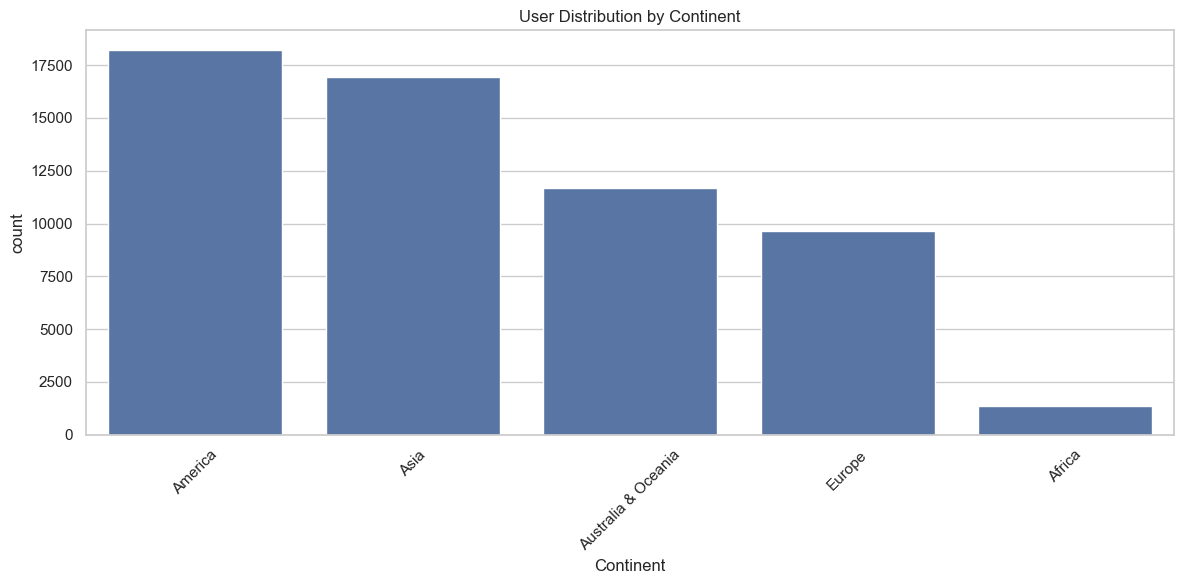

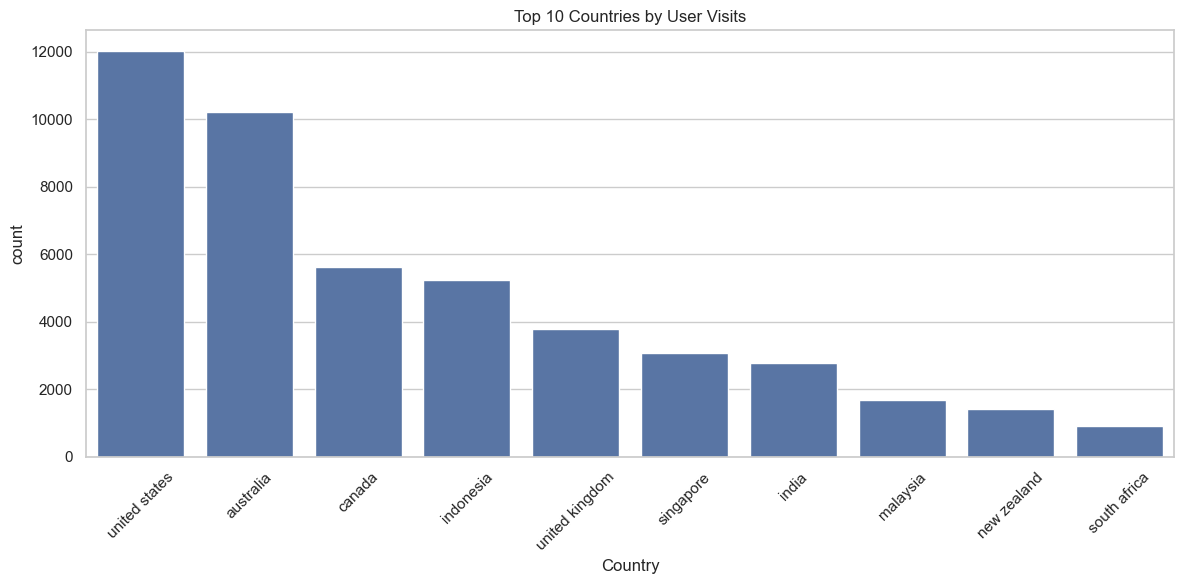

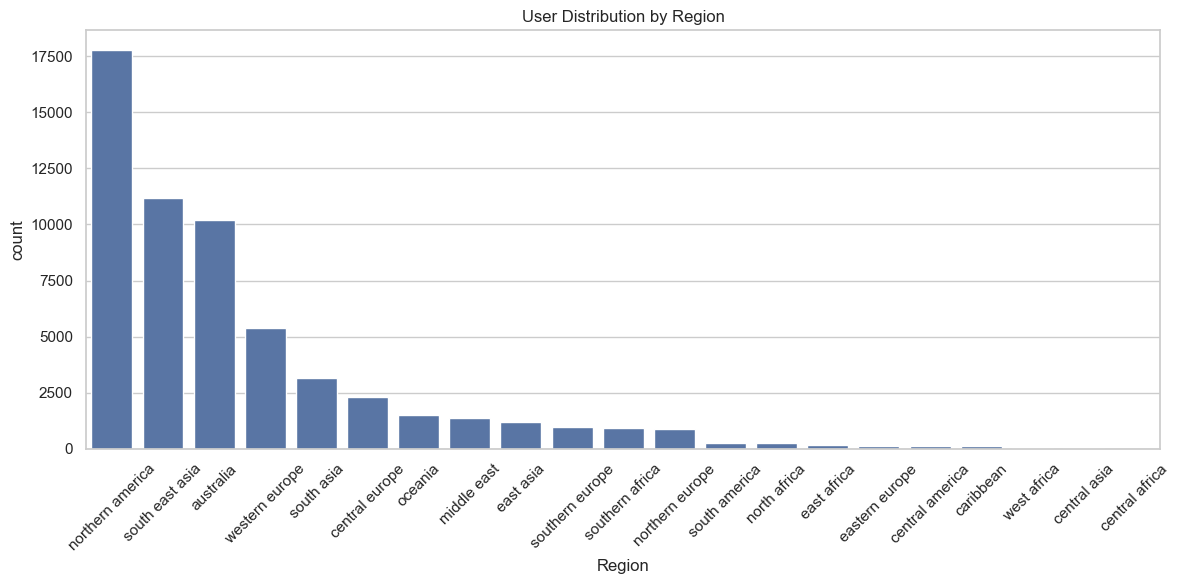

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)  # Global figure size

# ----------------------------------
# User Distribution by Continent
# ----------------------------------
plt.figure()
sns.countplot(data=df_fe, x='Continent', order=df_fe['Continent'].value_counts().index)
plt.title("User Distribution by Continent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------------------------------
# Top 10 Countries by User Visits
# ----------------------------------
plt.figure()
sns.countplot(data=df_fe, x='Country', order=df_fe['Country'].value_counts().head(10).index)
plt.title("Top 10 Countries by User Visits")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------------------------------
# User Distribution by Region
# ----------------------------------
plt.figure()
sns.countplot(data=df_fe, x='Region', order=df_fe['Region'].value_counts().index)
plt.title("User Distribution by Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


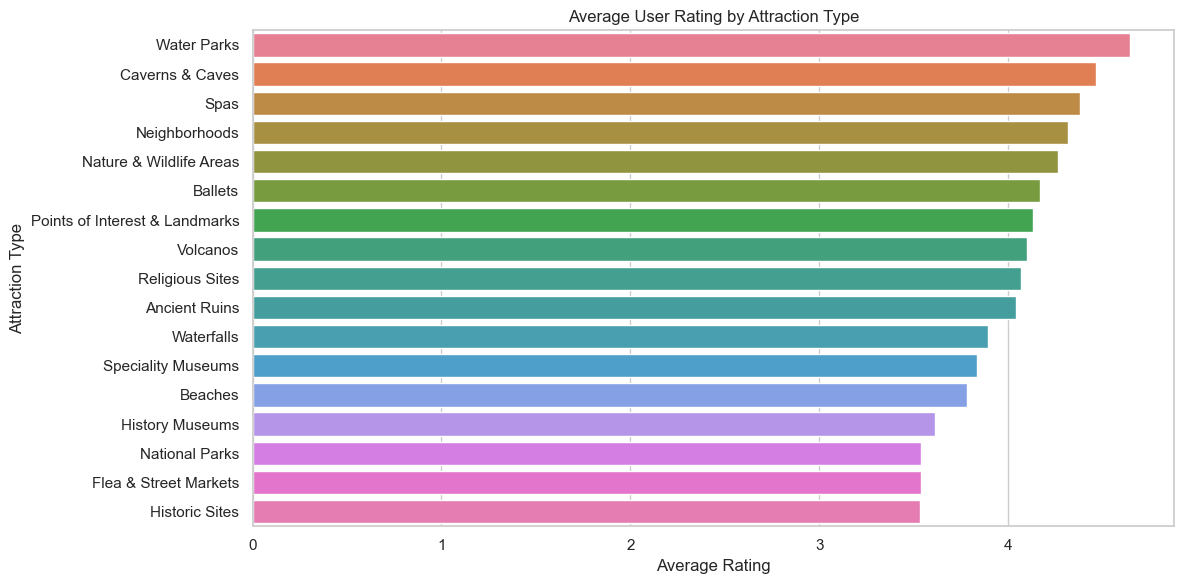

In [65]:
# -------------------------------
# 2. Attraction Types Popularity by Average Rating 
# -------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -----------------------------------------
# Create mapping dictionary
# -----------------------------------------
attraction_type_mapping = {
    2: "Ancient Ruins",
    10: "Ballets",
    13: "Beaches",
    19: "Caverns & Caves",
    34: "Flea & Street Markets",
    44: "Historic Sites",
    45: "History Museums",
    61: "National Parks",
    63: "Nature & Wildlife Areas",
    64: "Neighborhoods",
    72: "Points of Interest & Landmarks",
    76: "Religious Sites",
    82: "Spas",
    84: "Speciality Museums",
    91: "Volcanos",
    92: "Water Parks",
    93: "Waterfalls"
}

# -----------------------------------------
# Apply mapping to the DataFrame
# -----------------------------------------
df_fe['AttractionType'] = df_fe['AttractionTypeId'].map(attraction_type_mapping)

# -----------------------------------------
# 3. Group by Attraction Type and compute average rating
# -----------------------------------------
attraction_popularity = (
    df_fe.groupby('AttractionType')['Rating']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# -----------------------------------------
# Plot
# -----------------------------------------
plt.figure(figsize=(12, 6))
sns.barplot(
    data=attraction_popularity,
    x='Rating',
    y='AttractionType',
    hue='AttractionType',
    dodge=False,
    legend=False
)
plt.title("Average User Rating by Attraction Type")
plt.xlabel("Average Rating")
plt.ylabel("Attraction Type")
plt.tight_layout()
plt.show()



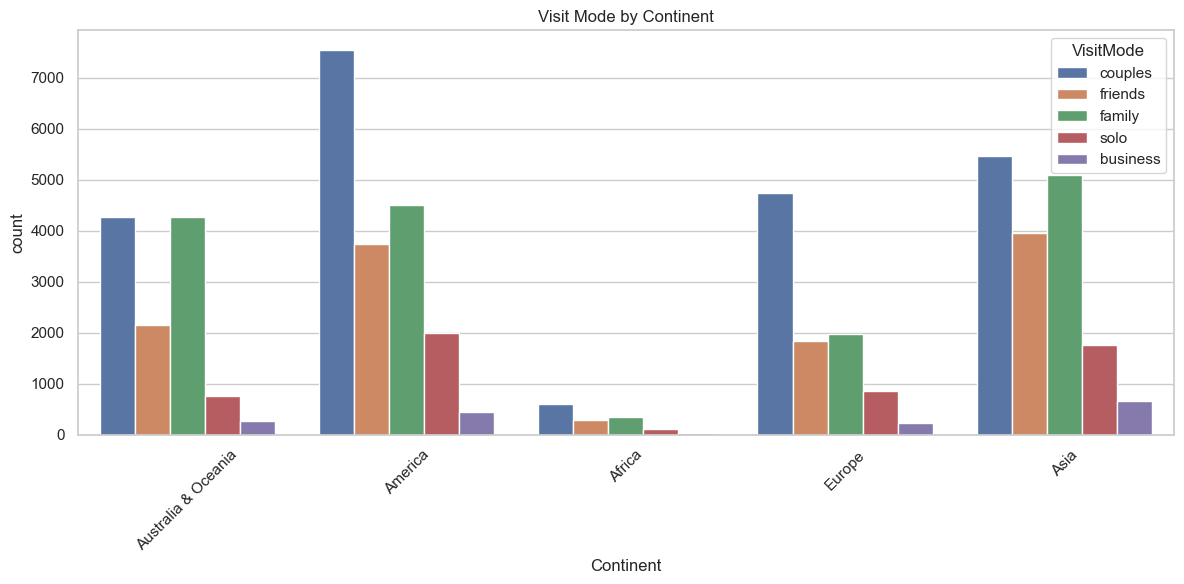

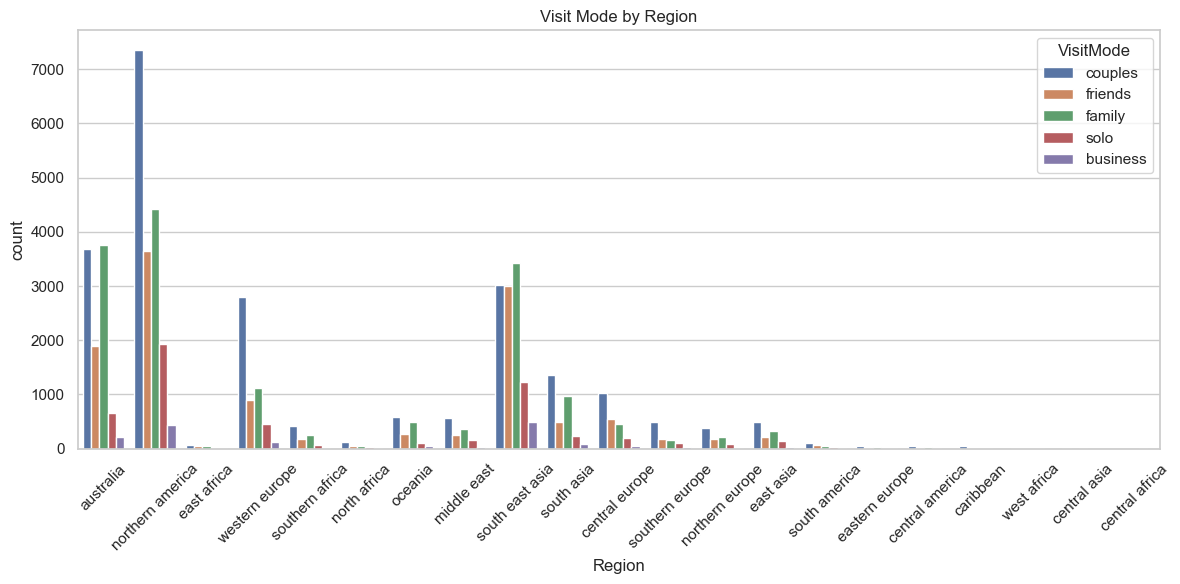

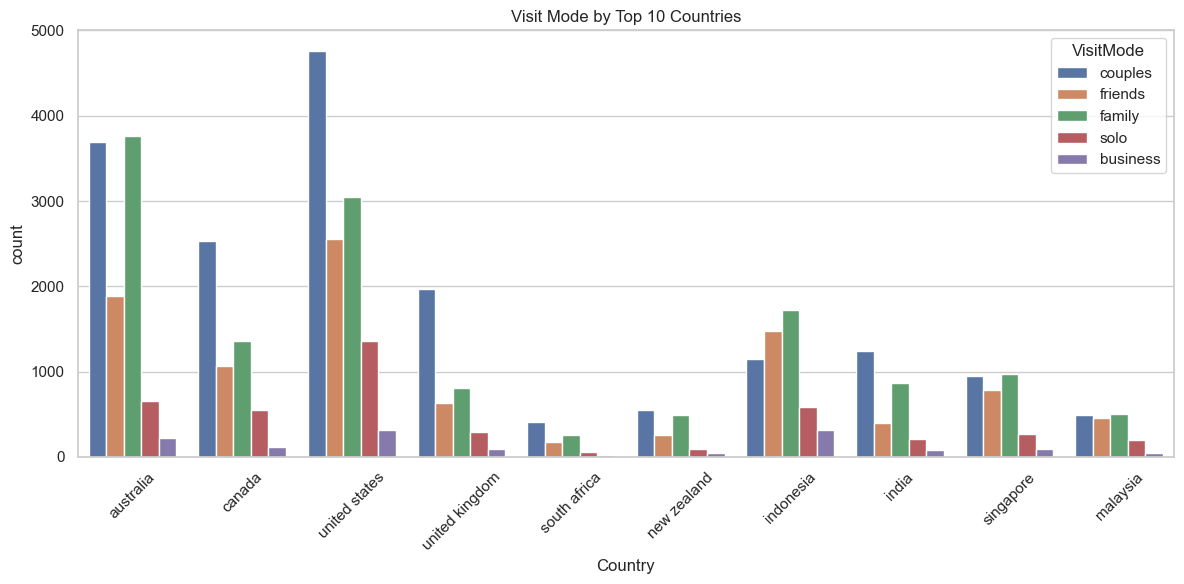

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ----------------------------------
# Visit Mode by Continent
# ----------------------------------
plt.figure()
sns.countplot(data=df_fe, x='Continent', hue='VisitMode')
plt.title("Visit Mode by Continent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------------------------------
# Visit Mode by Region
# ----------------------------------
plt.figure()
sns.countplot(data=df_fe, x='Region', hue='VisitMode')
plt.title("Visit Mode by Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------------------------------
# Visit Mode by Top 10 Countries
# ----------------------------------
top_countries = df_fe['Country'].value_counts().head(10).index

plt.figure()
sns.countplot(data=df_fe[df_fe['Country'].isin(top_countries)],
              x='Country', hue='VisitMode')
plt.title("Visit Mode by Top 10 Countries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


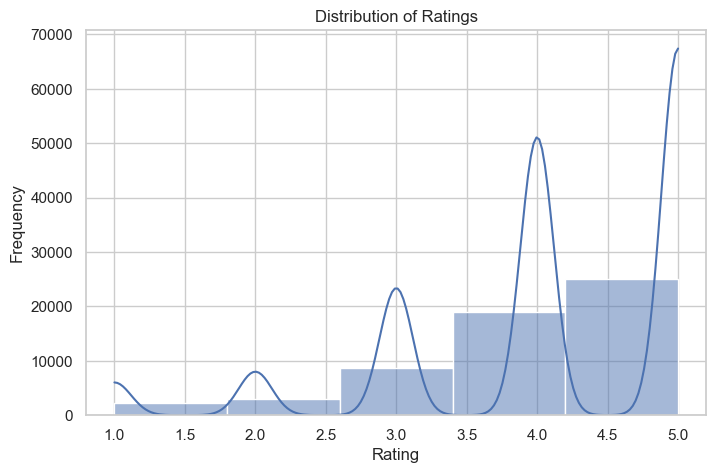

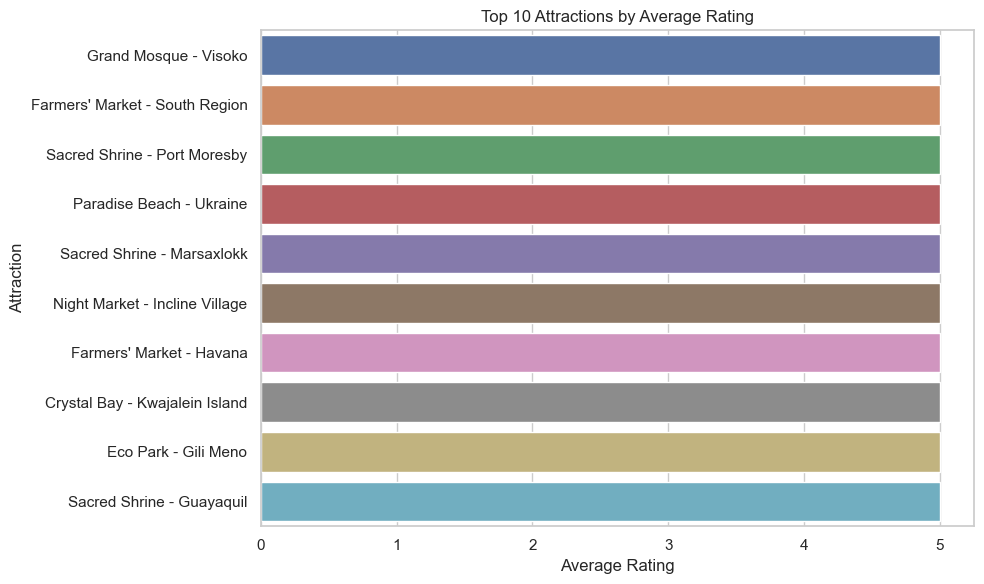

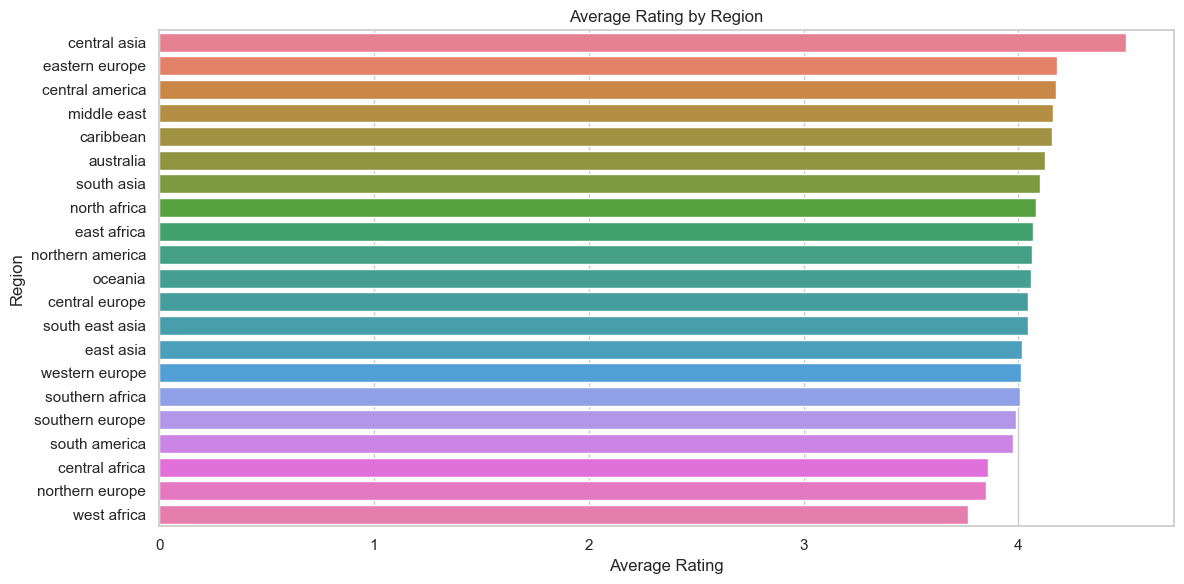

In [67]:
# -------------------------------
# 4. Rating Distribution by Attraction and Region
# -------------------------------

# 4.1 Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df_fe['Rating'], kde=True, bins=5)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# 4.2 Top 10 Rated Attractions (by average) 
top_attractions = (
    df_fe.groupby('Attraction')['Rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_attractions,
    x='Rating',
    y='Attraction',
    hue='Attraction',      
    dodge=False,
    legend=False
)
plt.title("Top 10 Attractions by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Attraction")
plt.tight_layout()
plt.show()


# 4.3 Average Rating by Region 
region_rating = df_fe.groupby('Region')['Rating'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(
    data=region_rating,
    x='Rating',
    y='Region',
    hue='Region',          
    dodge=False,
    legend=False
)
plt.title("Average Rating by Region")
plt.xlabel("Average Rating")
plt.ylabel("Region")
plt.tight_layout()
plt.show()



In [68]:
import pandas as pd
import os
import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# ------------------------------
# Step 1: Load Preprocessed Data
# ------------------------------
df = pd.read_excel("output/feature_engineered_data.xlsx")

# Drop leaky features
df = df.drop(columns=['Rating_Scaled', 'UserAvgRating_Scaled'], errors='ignore')

# ------------------------------
# Step 2: Split Features & Target
# ------------------------------
X = df.drop(columns=['Rating'])
y = df['Rating']

# ------------------------------
# Step 3: Encode Categorical Columns and Save LabelEncoders
# ------------------------------
encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    X.drop(columns=col, inplace=True)  # Drop raw string columns
    encoders[col] = le

# Save label encoders
os.makedirs("models", exist_ok=True)
joblib.dump(encoders, "models/regressor_label_encoders.pkl")

# ------------------------------
# Step 4: Handle Datetime Columns
# ------------------------------
for col in X.select_dtypes(include='datetime64').columns:
    X[col + '_year'] = X[col].dt.year
    X[col + '_month'] = X[col].dt.month
    X[col + '_day'] = X[col].dt.day
    X[col + '_weekday'] = X[col].dt.weekday

X = X.drop(columns=X.select_dtypes(include='datetime64').columns)

# ------------------------------
# Step 5: Train-Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# Step 6: Initial Model Training for Feature Selection
# ------------------------------
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

TOP_N = 20
selected_features = feature_importance_df['Feature'].head(TOP_N).tolist()

print("\nTop selected features:")
print(feature_importance_df.head(TOP_N))

# ------------------------------
# Step 7: Retrain Model on Selected Features
# ------------------------------
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(X_train_sel, y_train)

# ------------------------------
# Step 8: Final Evaluation
# ------------------------------
y_pred = final_model.predict(X_test_sel)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nFinal Evaluation with Top {TOP_N} Features:")
print(f" - Mean Squared Error: {mse:.4f}")
print(f" - R² Score: {r2:.4f}")

# ------------------------------
# Step 9: Save Model, Features, Template, Encoders
# ------------------------------
os.makedirs("models", exist_ok=True)
joblib.dump(final_model, "models/rating_regressor.pkl")
joblib.dump(selected_features, "models/regressor_features.pkl")

# Save input template row
template_row = X[selected_features].iloc[0]
joblib.dump(template_row, "models/input_template_row_regressor.pkl")

print("\nModel, selected features, encoders, and template row saved to 'models/'")



Top selected features:
                  Feature  Importance
17          UserAvgRating    0.634446
0           TransactionId    0.078131
5            AttractionId    0.053062
1                  UserId    0.044746
6                  CityId    0.029625
24      VisitDate_weekday    0.017504
15        Country_Encoded    0.013902
19  UserVisitCount_Scaled    0.011024
18         UserVisitCount    0.010920
11       AttractionTypeId    0.010695
2               VisitYear    0.009053
21         VisitDate_year    0.008983
20      VisitMonth_Scaled    0.008774
22        VisitDate_month    0.008665
3              VisitMonth    0.008535
16         Season_Encoded    0.008414
14         Region_Encoded    0.008401
10       AttractionCityId    0.007928
4             VisitModeId    0.007526
12      VisitMode_Encoded    0.007492

Final Evaluation with Top 20 Features:
 - Mean Squared Error: 0.3857
 - R² Score: 0.6615

Model, selected features, encoders, and template row saved to 'models/'



Original Class Distribution:
0     1296
1    18107
2    12958
3     9588
4     4395
dtype: int64
{'business': 1296, 'couples': 18107, 'family': 12958, 'friends': 9588, 'solo': 4395}

Performing feature selection using RandomForestClassifier...

Top selected features for classification:
              Feature  Importance
4         VisitModeId    0.826847
0       TransactionId    0.025339
1              UserId    0.021277
5        AttractionId    0.020134
6              CityId    0.017349
11   AttractionTypeId    0.013679
10   AttractionCityId    0.009004
2           VisitYear    0.008575
17     VisitDate_year    0.008240
20  VisitDate_weekday    0.007798
7           CountryId    0.005943
14    Country_Encoded    0.005854
3          VisitMonth    0.005776
16  VisitMonth_Scaled    0.005633
18    VisitDate_month    0.005537
15     Season_Encoded    0.003612
13     Region_Encoded    0.003476
8            RegionId    0.003140
9         ContinentId    0.001428
12  Continent_Encoded    0.00135

C:\Users\Abhishek PC\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [14:09:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report for XGBoost:

              precision    recall  f1-score   support

    business       1.00      1.00      1.00       324
     couples       1.00      1.00      1.00      4527
      family       1.00      1.00      1.00      3240
     friends       1.00      1.00      1.00      2397
        solo       1.00      1.00      1.00      1098

    accuracy                           1.00     11586
   macro avg       1.00      1.00      1.00     11586
weighted avg       1.00      1.00      1.00     11586



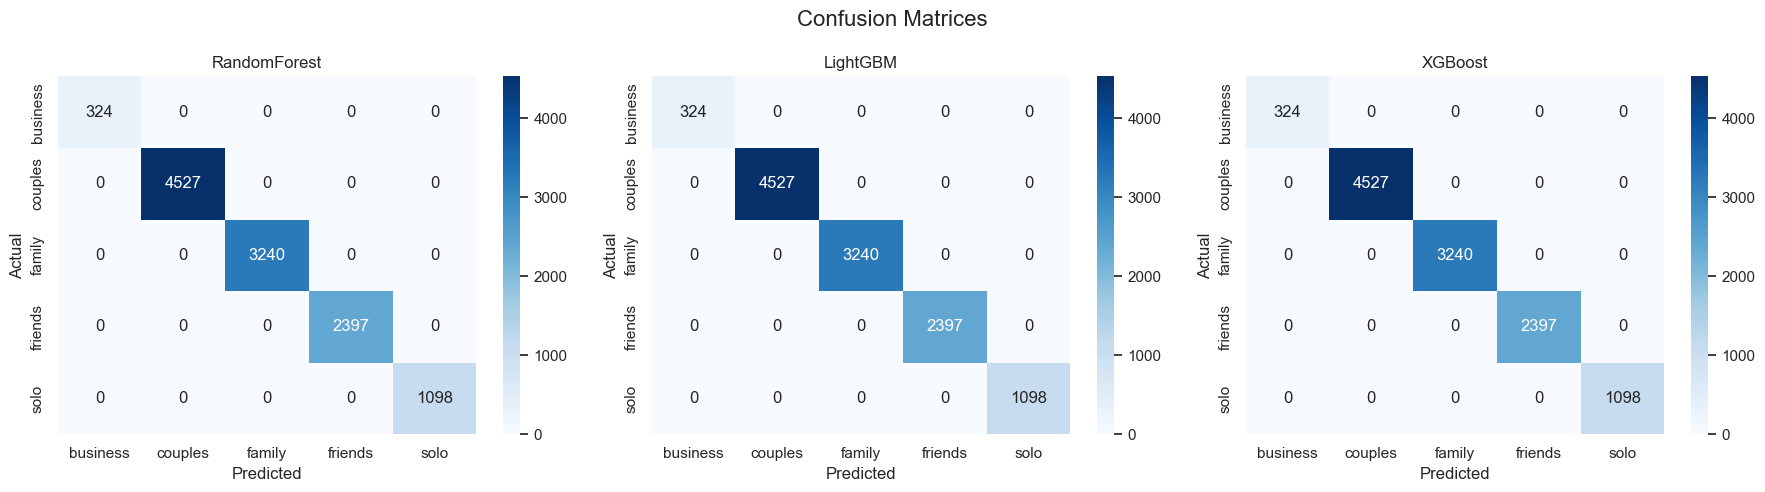


Cross-Validation (5-Fold GroupKFold using UserId):

RandomForest - GroupKFold CV Results:
 Mean F1-Score: 0.9996 ± 0.0001

LightGBM - GroupKFold CV Results:
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1668
[LightGBM] [Info] Number of data points in the train set: 46344, number of used features: 20
[LightGBM] [Info] Start training from score -3.584555
[LightGBM] [Info] Start training from score -0.932639
[LightGBM] [Info] Start training from score -1.277702
[LightGBM] [Info] Start training from score -1.579865
[LightGBM] [Info] Start training from score -2.363849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

C:\Users\Abhishek PC\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [14:10:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Abhishek PC\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [14:10:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Abhishek PC\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [14:10:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Abhishek PC\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [14:10:55] WARNING: C:\actions-runner\_work\xgbo

 Mean F1-Score: 1.0000 ± 0.0000

Evaluation Summary:
       Model  Accuracy  Precision  Recall  F1-Score
RandomForest       1.0        1.0     1.0       1.0
    LightGBM       1.0        1.0     1.0       1.0
     XGBoost       1.0        1.0     1.0       1.0

Best model based on F1-score: RandomForest
Saved best model as visitmode_classifier_randomforest.pkl for Streamlit app.


In [69]:
import pandas as pd
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split, GroupKFold, cross_val_score
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score,
    make_scorer
)
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# ------------------------------
# Step 1: Load and Preprocess Data
# ------------------------------
df = pd.read_excel("output/feature_engineered_data.xlsx")

# Drop potentially leaky features
leaky_features = [
    'Rating', 'Rating_Scaled', 'UserAvgRating', 'UserAvgRating_Scaled',
    'UserVisitCount', 'UserVisitCount_Scaled'
]
df = df.drop(columns=[col for col in leaky_features if col in df.columns], errors='ignore')

# Define target and group
y = df['VisitMode']
groups = df['UserId']

# Drop target and unnecessary columns
X = df.drop(columns=['VisitMode', 'VisitMode_Encoded'], errors='ignore')

# Encode all categorical features and save encoders
label_encoders = {}
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    X.drop(columns=col, inplace=True)  # Drop raw string columns
    label_encoders[col] = le

os.makedirs("models", exist_ok=True)
joblib.dump(label_encoders, "models/classifier_label_encoders.pkl")

# Handle datetime columns
for col in X.select_dtypes(include='datetime64').columns:
    X[col + '_year'] = X[col].dt.year
    X[col + '_month'] = X[col].dt.month
    X[col + '_day'] = X[col].dt.day
    X[col + '_weekday'] = X[col].dt.weekday
X = X.drop(columns=X.select_dtypes(include='datetime64').columns)

# Encode target
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)
class_names = target_encoder.classes_
joblib.dump(target_encoder, "models/visitmode_label_encoder.pkl")

# ------------------------------
# Step 2: Train-Test Split (Stratified)
# ------------------------------
X_train, X_test, y_train, y_test, groups_train, groups_test = train_test_split(
    X, y_encoded, groups, test_size=0.2, stratify=y_encoded, random_state=42
)

print("\nOriginal Class Distribution:")
print(pd.Series(Counter(y_train)).sort_index())
print(dict(zip(class_names, pd.Series(Counter(y_train)).sort_index().values)))

# ------------------------------
# Step 3: Feature Selection using RandomForestClassifier
# ------------------------------
print("\nPerforming feature selection using RandomForestClassifier...")
feature_selector = RandomForestClassifier(n_estimators=100, random_state=42)
feature_selector.fit(X_train, y_train)

importances = feature_selector.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

TOP_N = 20
selected_features = feature_importance_df['Feature'].head(TOP_N).tolist()
print("\nTop selected features for classification:")
print(feature_importance_df.head(TOP_N))

joblib.dump(selected_features, "models/classifier_features.pkl")

X_train = X_train[selected_features]
X_test = X_test[selected_features]
X = X[selected_features]  # for CV

def generate_neutral_template(X, classifier_features):
    """
    Generate a 'neutral' input row for inference UI by combining:
    - median for numeric features
    - mode for categorical features
    Returns a Series matching classifier_features.
    """
    neutral_row = {}

    for col in classifier_features:
        if col not in X.columns:
            raise ValueError(f"Missing required feature in X: {col}")
        
        # Use median if numeric, else mode
        if pd.api.types.is_numeric_dtype(X[col]):
            neutral_row[col] = X[col].median()
        else:
            neutral_row[col] = X[col].mode().iloc[0]
    
    return pd.Series(neutral_row)

template_row = generate_neutral_template(X, selected_features)
joblib.dump(template_row, "models/input_template_row_classifier.pkl")
print("Saved input_template_row_classifier.pkl for use in Streamlit inference")

# ------------------------------
# Step 4: Handle Class Imbalance with SMOTE
# ------------------------------
print("\n📍 Checking for missing values before SMOTE...")
missing_before = X_train.isnull().sum()
print(missing_before[missing_before > 0])

# Impute missing values (simple strategy: mean)
X_train = X_train.fillna(X_train.mean())

print("Missing values filled. Proceeding to SMOTE...")
print("\n Applying SMOTE oversampling to balance training classes...")
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE class distribution:")
resampled_counts = pd.Series(Counter(y_train_res)).sort_index()
print(resampled_counts)
print(dict(zip(class_names, resampled_counts.values)))

# ------------------------------
# Step 5: Initialize Models
# ------------------------------
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    "LightGBM": LGBMClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# ------------------------------
# Step 6: Train, Evaluate, Visualize
# ------------------------------
metrics_summary = []

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Confusion Matrices", fontsize=16)

for idx, (name, model) in enumerate(models.items()):
    print(f"\nTraining & Evaluating: {name}")
    
    # Use resampled data only for RandomForest
    if name == "RandomForest":
        model.fit(X_train_res, y_train_res)
    else:
        model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred, target_names=class_names))

    metrics_summary.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx], cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    axes[idx].set_title(name)
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

    # Save individual model
    joblib.dump(model, f"models/visitmode_classifier_{name.lower()}.pkl")

plt.tight_layout()
plt.show()

# ------------------------------
# Step 7: Cross-Validation
# ------------------------------
print("\nCross-Validation (5-Fold GroupKFold using UserId):")
gkf = GroupKFold(n_splits=5)
f1_scorer = make_scorer(f1_score, average='weighted')

for name, model in models.items():
    print(f"\n{name} - GroupKFold CV Results:")
    scores = cross_val_score(model, X, y_encoded, groups=groups, cv=gkf, scoring=f1_scorer)
    print(f" Mean F1-Score: {scores.mean():.4f} ± {scores.std():.4f}")

# ------------------------------
# Step 8: Summary Table
# ------------------------------
summary_df = pd.DataFrame(metrics_summary)
print("\nEvaluation Summary:")
print(summary_df.sort_values(by="F1-Score", ascending=False).to_string(index=False))

# ------------------------------
# Step 9: Save Best Model
# ------------------------------
best_model_name = summary_df.sort_values(by="F1-Score", ascending=False).iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest model based on F1-score: {best_model_name}")
joblib.dump(best_model, "models/visitmode_classifier_randomforest.pkl")
print("Saved best model as visitmode_classifier_randomforest.pkl for Streamlit app.")


In [70]:
print("Class distribution (VisitMode):")
print(df['VisitMode'].value_counts(normalize=True))

Class distribution (VisitMode):
VisitMode
couples     0.390713
family      0.279613
friends     0.206888
solo        0.094821
business    0.027965
Name: proportion, dtype: float64


In [71]:
# ------------------------------
# Step 10: Test Model Prediction on Template Row
# ------------------------------

print("\nTesting saved model inference with template row...")

# Load the saved items as Streamlit would
model = joblib.load("models/visitmode_classifier_randomforest.pkl")
features = joblib.load("models/classifier_features.pkl")
label_encoder = joblib.load("models/visitmode_label_encoder.pkl")
template_row = joblib.load("models/input_template_row_classifier.pkl")

# Convert to DataFrame (1 row)
test_input = pd.DataFrame([template_row])

# Ensure all selected features exist
missing = [f for f in features if f not in test_input.columns]
if missing:
    print(f"Missing features: {missing}")
else:
    # Predict using the model
    y_pred_encoded = model.predict(test_input[features])[0]
    y_pred_label = label_encoder.inverse_transform([y_pred_encoded])[0]

    # Show prediction and probabilities
    print(f"Prediction on template row: {y_pred_label}")

    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(test_input[features])[0]
        print("Class probabilities:")
        for label, p in zip(label_encoder.classes_, proba):
            print(f"  {label}: {p:.2%}")



Testing saved model inference with template row...
Prediction on template row: family
Class probabilities:
  business: 0.00%
  couples: 0.00%
  family: 96.00%
  friends: 3.00%
  solo: 1.00%


In [72]:
# ------------------------------
# Step 4: Cross-Validation with GroupKFold (UserId)
# ------------------------------
print("\n Cross-Validation (5-Fold GroupKFold using UserId):\n")

group_kfold = GroupKFold(n_splits=5)
groups = df.loc[X.index, "UserId"]  # Use UserId to group samples

for name, model in models.items():
    scores = cross_val_score(
        model, X, y_encoded, groups=groups, cv=group_kfold, scoring='f1_weighted'
    )
    print(f"{name} - GroupKFold CV Results:")
    print(f" Mean F1-Score: {scores.mean():.4f} ± {scores.std():.4f}\n")

# ------------------------------
# Step 5: Print Evaluation Summary Table
# ------------------------------
summary_df = pd.DataFrame(metrics_summary)
print("\n Evaluation Summary:")
print(summary_df.sort_values(by="F1-Score", ascending=False).to_string(index=False))


 Cross-Validation (5-Fold GroupKFold using UserId):

RandomForest - GroupKFold CV Results:
 Mean F1-Score: 0.9996 ± 0.0001

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009737 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1668
[LightGBM] [Info] Number of data points in the train set: 46344, number of used features: 20
[LightGBM] [Info] Start training from score -3.584555
[LightGBM] [Info] Start training from score -0.932639
[LightGBM] [Info] Start training from score -1.277702
[LightGBM] [Info] Start training from score -1.579865
[LightGBM] [Info] Start training from score -2.363849
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

C:\Users\Abhishek PC\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [14:12:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Abhishek PC\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [14:12:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Abhishek PC\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [14:12:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Abhishek PC\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [14:12:28] WARNING: C:\actions-runner\_work\xgbo

XGBoost - GroupKFold CV Results:
 Mean F1-Score: 1.0000 ± 0.0000


 Evaluation Summary:
       Model  Accuracy  Precision  Recall  F1-Score
RandomForest       1.0        1.0     1.0       1.0
    LightGBM       1.0        1.0     1.0       1.0
     XGBoost       1.0        1.0     1.0       1.0


In [73]:
# ------------------------------
# Step 6: Feature Importances
# ------------------------------
print("\n Feature Importances by Model:\n")

for name, model in models.items():
    print(f"\n {name} Feature Importances:")
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        importance_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)

        print(importance_df.head(10).to_string(index=False))
    else:
        print(" This model does not support feature importances.")



 Feature Importances by Model:


 RandomForest Feature Importances:
         Feature  Importance
     VisitModeId    0.763514
    AttractionId    0.035003
AttractionCityId    0.028577
   TransactionId    0.025944
AttractionTypeId    0.016814
          UserId    0.015283
          CityId    0.014200
       VisitYear    0.012695
       CountryId    0.010910
  VisitDate_year    0.009693

 LightGBM Feature Importances:
         Feature  Importance
   TransactionId        3524
     VisitModeId        1764
          UserId        1374
    AttractionId         696
          CityId         359
AttractionCityId         103
       CountryId          64
 Country_Encoded          36
  Region_Encoded          32
AttractionTypeId          20

 XGBoost Feature Importances:
         Feature  Importance
     VisitModeId    0.999877
AttractionCityId    0.000094
    AttractionId    0.000013
     ContinentId    0.000003
AttractionTypeId    0.000002
       CountryId    0.000002
  Season_Encoded    0.00000

## Recommendation Task

1. Collaborative Filtering

Based on user–item interactions (ratings).

Good for personalization if there's enough user-rating data.

2. Content-Based Filtering

Based on attributes like AttractionType, City, Country, etc.

Good for new users or attractions (cold-start).

Before trying to generate recommendations for a user, check what user IDs are actually present:

In [74]:
# Collaborative Filtering (sparse user–item matrix)
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix

# Load dataset with user-attraction ratings
df = pd.read_excel("output/feature_engineered_data.xlsx")

# We'll use only essential columns
ratings_df = df[['UserId', 'AttractionId', 'Rating']].copy()
ratings_df['Rating'] = ratings_df['Rating'].astype(np.float32)

# Factorize IDs -> compact integer indices (saves a LOT of memory)
user_codes, user_uniques = pd.factorize(ratings_df['UserId'])
item_codes, item_uniques = pd.factorize(ratings_df['AttractionId'])

n_users = len(user_uniques)
n_items = len(item_uniques)

# Build SPARSE user-item matrix (CSR) instead of dense pivot
user_item_matrix = coo_matrix(
    (ratings_df['Rating'].to_numpy(np.float32), (user_codes, item_codes)),
    shape=(n_users, n_items),
    dtype=np.float32
).tocsr()

print("Available User IDs:", user_uniques[:10].tolist())  # first 10 real UserIds
print("Total unique users:", n_users)
print("Total unique attractions:", n_items)
print("Non-zero ratings:", user_item_matrix.nnz)  # number of actual ratings


Available User IDs: [70456, 7567, 79069, 31019, 43611, 43471, 76492, 20977, 18655, 62907]
Total unique users: 33530
Total unique attractions: 1610
Non-zero ratings: 50274


### For Collaborative Filtering (e.g. user-item matrix with predicted ratings)
  - Evaluate Using RMSE
  - If we are predicting ratings, use RMSE to compare predicted vs actual ratings.

For Top-N Recommendations (like suggesting similar attractions)

Use ranking metrics like: 
  - Evaluate Using Mean Average Precision at K (MAPK)

To compute MAPK, we need:
  - True items (what the user actually interacted with — e.g., attractions they rated or visited).
  - Predicted ranked list (recommendations made for the user).

Since your code predicts a ranking of attractions for a user based on similar users, you’re not explicitly predicting numerical ratings, but rather ranking items to recommend. That means:

MAPK (Mean Average Precision at K) is the right metric
  - Because this is a top-N recommendation task, not a regression task.

In [75]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from scipy.sparse import coo_matrix

# -----------------------------
# Load data
# -----------------------------
df = pd.read_excel("output/feature_engineered_data.xlsx")
ratings_df = df[['UserId', 'AttractionId', 'Rating']].copy()
ratings_df['Rating'] = ratings_df['Rating'].astype(np.float32)

# -----------------------------
# Train-Test Split (20% test)
# -----------------------------
train_df, test_df = train_test_split(ratings_df, test_size=0.2, random_state=42)

# -----------------------------
# Build SPARSE user-item matrix from train data
# (NO dense pivot, NO full user-user similarity matrix)
# -----------------------------
train_df = train_df.copy()
train_df['Rating'] = train_df['Rating'].astype(np.float32)

user_codes, user_uniques = pd.factorize(train_df['UserId'])
item_codes, item_uniques = pd.factorize(train_df['AttractionId'])

n_users = len(user_uniques)
n_items = len(item_uniques)
print(f"User-Item Matrix shape → Users: {n_users:,}, Attractions: {n_items:,}")

X = coo_matrix(
    (train_df['Rating'].to_numpy(np.float32), (user_codes, item_codes)),
    shape=(n_users, n_items),
    dtype=np.float32
).tocsr()

# Row-normalize so cosine similarity becomes dot product
X_norm = normalize(X, norm="l2", axis=1, copy=True)

# Fast mappings
user_to_row = {uid: i for i, uid in enumerate(user_uniques)}
item_to_col = {iid: j for j, iid in enumerate(item_uniques)}
col_to_item = np.array(item_uniques)

# -----------------------------
# Popularity fallback (use ALL ratings)
# -----------------------------
popular_items_sorted = (
    ratings_df.groupby('AttractionId')['Rating']
    .mean()
    .sort_values(ascending=False)
    .index
    .to_list()
)

def fallback_popular_recommendations(user_id, top_n=5):
    already_rated = set(
        ratings_df.loc[ratings_df['UserId'] == user_id, 'AttractionId'].tolist()
    )
    recs = [iid for iid in popular_items_sorted if iid not in already_rated]
    return recs[:top_n]

# -----------------------------
# Neighbor cache (speeds up RMSE loop)
# -----------------------------
_neighbors_cache = {}

def _get_top_neighbors(u_row, n_neighbors=10):
    """
    Compute cosine similarity of user u_row to ALL users,
    return top neighbor rows + similarities.
    Cached so we compute once per user in evaluation.
    """
    key = (u_row, n_neighbors)
    if key in _neighbors_cache:
        return _neighbors_cache[key]

    sims = (X_norm @ X_norm[u_row].T).toarray().ravel().astype(np.float32)
    sims[u_row] = -1.0  # exclude self

    k = min(n_neighbors, n_users - 1)
    nn_idx = np.argpartition(-sims, kth=k)[:k]
    nn_idx = nn_idx[np.argsort(-sims[nn_idx])]
    nn_sims = sims[nn_idx]

    _neighbors_cache[key] = (nn_idx, nn_sims)
    return nn_idx, nn_sims

# -----------------------------
# Recommendation Function (NO user_similarity_df)
# -----------------------------
def get_user_recommendations(user_id, top_n=5, n_neighbors=10):
    if user_id not in user_to_row:
        print(f" User ID {user_id} not found in training set. Using fallback.")
        return fallback_popular_recommendations(user_id, top_n=top_n)

    u = user_to_row[user_id]
    print(f"\n Generating recommendations for User {user_id}...")

    nn_idx, nn_sims = _get_top_neighbors(u, n_neighbors=n_neighbors)

    # If all similarities are <= 0, collaborative signal is weak
    if np.all(nn_sims <= 0):
        print(" No positive-similarity neighbors. Using fallback.")
        return fallback_popular_recommendations(user_id, top_n=top_n)

    # Neighbor ratings submatrix: (k x n_items)
    Rn = X[nn_idx]

    # Weighted sum for every item: sum(sim_i * rating_i,j)
    weighted = Rn.multiply(nn_sims.reshape(-1, 1))
    numerator = np.array(weighted.sum(axis=0)).ravel()

    # Denominator: sum(sim_i) over neighbors who rated each item
    mask = Rn.copy()
    mask.data = np.ones_like(mask.data, dtype=np.float32)
    denominator = np.array(mask.multiply(nn_sims.reshape(-1, 1)).sum(axis=0)).ravel()

    scores = np.full(n_items, -np.inf, dtype=np.float32)
    valid = denominator > 0
    scores[valid] = numerator[valid] / denominator[valid]

    # Exclude items already rated by this user (in train)
    already_rated_cols = X[u].indices
    scores[already_rated_cols] = -np.inf

    # Top-N items
    top_n = min(top_n, n_items)
    top_cols = np.argpartition(-scores, kth=top_n)[:top_n]
    top_cols = top_cols[np.argsort(-scores[top_cols])]

    recs = col_to_item[top_cols].tolist()
    if not recs:
        print(" No collaborative filtering recommendations found. Using fallback.")
        return fallback_popular_recommendations(user_id, top_n=top_n)

    return recs

# -----------------------------
# Optional: Show Names
# -----------------------------
attraction_map = df[['AttractionId', 'Attraction']].drop_duplicates().set_index('AttractionId')

# -----------------------------
# Example Usage
# -----------------------------
user_id = 32
recommendations = get_user_recommendations(user_id, top_n=5, n_neighbors=10)

print(f" Recommended attractions for User {user_id}: {recommendations}")
if recommendations:
    print("\n Recommended Attraction Names:")
    for attr_id in recommendations:
        if attr_id in attraction_map.index:
            print(f"   {attr_id}: {attraction_map.loc[attr_id]['Attraction']}")
        else:
            print(f"   {attr_id}: (name not found)")

# -----------------------------
# Predict rating (for RMSE) using neighbors only
# -----------------------------
def predict_rating(user_id, attraction_id, n_neighbors=10):
    if user_id not in user_to_row or attraction_id not in item_to_col:
        return None

    u = user_to_row[user_id]
    j = item_to_col[attraction_id]

    nn_idx, nn_sims = _get_top_neighbors(u, n_neighbors=n_neighbors)

    # ratings from neighbors for this item (k,)
    r = X[nn_idx, j].toarray().ravel().astype(np.float32)

    mask = (r > 0) & (nn_sims > 0)
    if mask.sum() == 0:
        return None

    denom = nn_sims[mask].sum()
    if denom <= 0:
        return None

    return float(np.dot(r[mask], nn_sims[mask]) / denom)

# -----------------------------
# RMSE Evaluation on Test Set
# -----------------------------
print("\n Evaluating Recommendation Accuracy (RMSE)...")

y_true, y_pred = [], []
for _, row in test_df.iterrows():
    user = row['UserId']
    item = row['AttractionId']
    actual = float(row['Rating'])

    pred = predict_rating(user, item, n_neighbors=10)
    if pred is None:
        continue

    y_true.append(actual)
    y_pred.append(pred)

if y_true and y_pred:
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f" RMSE on Test Set: {rmse:.4f}  (computed on {len(y_true)} test points)")
else:
    print(" Not enough overlapping users/items for RMSE evaluation.")


User-Item Matrix shape → Users: 29,255, Attractions: 1,538

 Generating recommendations for User 32...
 Recommended attractions for User 32: [1875, 1395, 1384, 1385, 2302]

 Recommended Attraction Names:
   1875: Botanical Garden - Yerevan
   1395: Golden Sand Beach - Victoria Falls
   1384: Crystal Bay - Zanzibar Island
   1385: Golden Sand Beach - Zanzibar Island
   2302: Golden Sand Beach - Kota Kinabalu District

 Evaluating Recommendation Accuracy (RMSE)...
 RMSE on Test Set: 4.7186  (computed on 2457 test points)


In [76]:
# ----------------------------------------
# MAPK Implementation
# ----------------------------------------
def apk(actual, predicted, k=5):
    """Average Precision at K"""
    if not actual:
        return 0.0

    actual = set(actual)
    predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i, p in enumerate(predicted):
        if p in actual:
            # avoid double counting duplicates
            if p not in predicted[:i]:
                num_hits += 1.0
                score += num_hits / (i + 1.0)

    return score / min(len(actual), k)


def mapk(actual_list, predicted_list, k=5):
    """Mean Average Precision at K"""
    return float(np.mean([apk(a, p, k) for a, p in zip(actual_list, predicted_list)]))


# ----------------------------------------
# Prepare Data for MAPK Evaluation
# ----------------------------------------
top_k = 5
n_users_to_eval = 100  # reduce runtime

actual_list = []
predicted_list = []

np.random.seed(42)

# IMPORTANT: sample only users that exist in the TRAIN matrix (user_uniques)
available_users = np.array(user_uniques)  # real UserIds present in training
if len(available_users) < n_users_to_eval:
    n_users_to_eval = len(available_users)

eval_users = np.random.choice(available_users, size=n_users_to_eval, replace=False)

for user_id in eval_users:
    # Use the full ratings_df to find "relevant" items (as in your original)
    user_ratings = ratings_df[ratings_df['UserId'] == user_id]

    # Relevant items: rated 4 or 5
    relevant_items = user_ratings.loc[user_ratings['Rating'] >= 4, 'AttractionId'].tolist()
    if not relevant_items:
        continue

    recommendations = get_user_recommendations(user_id, top_n=top_k, n_neighbors=10)
    if not recommendations:
        recommendations = fallback_popular_recommendations(user_id, top_n=top_k)

    actual_list.append(relevant_items)
    predicted_list.append(recommendations)

# ----------------------------------------
# Compute and Print MAPK
# ----------------------------------------
if actual_list and predicted_list:
    mapk_score = mapk(actual_list, predicted_list, k=top_k)
    print(f"\n Mean Average Precision at {top_k} (MAP{top_k}): {mapk_score:.4f} "
          f"(evaluated on {len(actual_list)} users)")
else:
    print("\n MAPK could not be computed (no eligible users with relevant items).")



 Generating recommendations for User 38382...

 Generating recommendations for User 28069...

 Generating recommendations for User 16507...

 Generating recommendations for User 29803...

 Generating recommendations for User 20904...

 Generating recommendations for User 41157...

 Generating recommendations for User 85549...

 Generating recommendations for User 38274...

 Generating recommendations for User 67035...

 Generating recommendations for User 3891...

 Generating recommendations for User 58488...

 Generating recommendations for User 35690...

 Generating recommendations for User 2749...

 Generating recommendations for User 41398...

 Generating recommendations for User 79533...

 Generating recommendations for User 894...

 Generating recommendations for User 42676...

 Generating recommendations for User 70146...

 Generating recommendations for User 74714...

 Generating recommendations for User 3465...

 Generating recommendations for User 13246...

 Generating recom

In [77]:
# -----------------------------
# Save Collaborative Filtering Model Components (SMALL)
# -----------------------------
import joblib
import numpy as np

collab_model = {
    "X": X,               # CSR
    "X_norm": X_norm,     # CSR normalized
    "user_ids": np.array(user_uniques),
    "item_ids": np.array(item_uniques),
    "user_to_row": user_to_row,
    "item_to_col": item_to_col,
    "popular_items_sorted": popular_items_sorted,
}

joblib.dump(collab_model, "models/collaborative_model.pkl", compress=3)
print("Collaborative filtering model saved to 'models/collaborative_model.pkl'")


Collaborative filtering model saved to 'models/collaborative_model.pkl'


In [78]:
# Load attraction metadata
attraction_df = df[['AttractionId', 'AttractionTypeId',  'CityName', 'Country', 'Region', 'Continent']].drop_duplicates()
print(attraction_df['AttractionId'].unique())

[ 640  841  673 ... 2029 2063 2466]


In [79]:
# Content Based Filtering
import pandas as pd
import numpy as np
import joblib

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# -----------------------------
# Load Data
# -----------------------------
df = pd.read_excel("output/feature_engineered_data.xlsx")
ratings_df = df[['UserId', 'AttractionId', 'Rating']]

# -----------------------------
# Step 1: Build Attraction Metadata Table
# -----------------------------
meta_cols = ['AttractionId', 'Attraction', 'AttractionTypeId', 'CityName', 'Country', 'Region', 'Continent']
attraction_df = df[meta_cols].drop_duplicates(subset='AttractionId').dropna(subset=['AttractionId']).reset_index(drop=True)

# -----------------------------
# Step 2: Feature Selection on Metadata Fields
# -----------------------------
# We'll use a supervised proxy: predict average rating using RF to rank metadata importance
avg_ratings = ratings_df.groupby('AttractionId')['Rating'].mean().reset_index()
attraction_df = pd.merge(attraction_df, avg_ratings, on='AttractionId', how='left')

metadata_features = ['AttractionTypeId', 'CityName', 'Country', 'Region', 'Continent']
feature_df = attraction_df[metadata_features].copy()

# Encode categoricals
for col in feature_df.select_dtypes(include='object').columns:
    feature_df[col] = LabelEncoder().fit_transform(feature_df[col].astype(str))

# Train RF to find important metadata features
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(feature_df, attraction_df['Rating'])

# Select top-N features
importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': metadata_features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
TOP_N = 4
selected_fields = importance_df['Feature'].head(TOP_N).tolist()
print(f"\nSelected metadata fields for TF-IDF: {selected_fields}")

# -----------------------------
# Step 3: Combine Selected Fields for TF-IDF
# -----------------------------
attraction_df['combined_features'] = attraction_df[selected_fields].astype(str).agg(' '.join, axis=1).str.lower()

# -----------------------------
# Step 4: TF-IDF Vectorization
# -----------------------------
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(attraction_df['combined_features'])

# -----------------------------
# Step 5: Cosine Similarity
# -----------------------------
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# -----------------------------
# Step 6: Index Mapping
# -----------------------------
indices = pd.Series(attraction_df.index, index=attraction_df['AttractionId'])

# -----------------------------
# Step 7: Save Model Artifacts
# -----------------------------
content_model = {
    "cosine_sim": cosine_sim,
    "attraction_df": attraction_df[['AttractionId', 'Attraction']].reset_index(drop=True),
    "indices": indices,
    "selected_fields": selected_fields,
    "tfidf_vectorizer": tfidf
}
joblib.dump(content_model, "models/content_based_model.pkl")
print("Content-based model saved to models/content_based_model.pkl")

# -----------------------------
# Step 8: Recommendation Function
# -----------------------------
def get_similar_attractions(attraction_id, top_n=5):
    if attraction_id not in indices:
        return []
    idx = indices[attraction_id]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]
    attraction_indices = [i[0] for i in sim_scores]
    return attraction_df.iloc[attraction_indices]['AttractionId'].tolist()

# -----------------------------
# Step 9: RMSE Evaluation (Optional)
# -----------------------------
print("\nEvaluating RMSE for Content-Based Filtering...")

sample_users = ratings_df['UserId'].unique()[:100]
y_true, y_pred = [], []

for user in sample_users:
    user_data = ratings_df[ratings_df['UserId'] == user]
    for _, row in user_data.iterrows():
        attraction_id = row['AttractionId']
        actual_rating = row['Rating']

        if attraction_id not in indices:
            continue

        idx = indices[attraction_id]
        sim_scores = cosine_sim[idx]
        similar_idxs = sim_scores.argsort()[::-1][1:6]
        similar_ids = attraction_df.iloc[similar_idxs]['AttractionId']

        similar_ratings = ratings_df[
            (ratings_df['AttractionId'].isin(similar_ids)) &
            (ratings_df['UserId'] == user)
        ]

        if similar_ratings.empty:
            continue

        weights = sim_scores[similar_idxs][:len(similar_ratings)]
        ratings = similar_ratings['Rating'].values
        pred_rating = np.dot(ratings, weights[:len(ratings)]) / (weights[:len(ratings)].sum() + 1e-8)

        y_true.append(actual_rating)
        y_pred.append(pred_rating)

if y_true:
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"RMSE on Content-Based Filtering: {rmse:.4f}")
else:
    print("Not enough overlap for RMSE calculation.")

# -----------------------------
# Step 10: Example Output
# -----------------------------
example_attraction_id = 640  # Replace with real ID
similar = get_similar_attractions(example_attraction_id, top_n=5)

if similar:
    print(f"\nAttractions similar to {example_attraction_id}:")
    for aid in similar:
        name = attraction_df.loc[attraction_df['AttractionId'] == aid, 'Attraction'].values[0]
        print(f" - {aid}: {name}")
else:
    print("No similar attractions found.")



Selected metadata fields for TF-IDF: ['CityName', 'AttractionTypeId', 'Country', 'Region']
Content-based model saved to models/content_based_model.pkl

Evaluating RMSE for Content-Based Filtering...
RMSE on Content-Based Filtering: 0.6396

Attractions similar to 640:
 - 1603: Sunset Cove - Grand Cayman
 - 1594: Cathedral - Santo Domingo
 - 2653: Grand Mosque - Klosters
 - 1981: Ancient Temple - Manama
 - 2737: Golden Sand Beach - Seltjarnarnes


In [80]:
import joblib

classifier_features = joblib.load("models/classifier_features.pkl")

print("Classifier expects features:")
for feature in classifier_features:
    print(f" - {feature}")


Classifier expects features:
 - VisitModeId
 - TransactionId
 - UserId
 - AttractionId
 - CityId
 - AttractionTypeId
 - AttractionCityId
 - VisitYear
 - VisitDate_year
 - VisitDate_weekday
 - CountryId
 - Country_Encoded
 - VisitMonth
 - VisitMonth_Scaled
 - VisitDate_month
 - Season_Encoded
 - Region_Encoded
 - RegionId
 - ContinentId
 - Continent_Encoded


In [81]:
import joblib

regressor_features = joblib.load("models/regressor_features.pkl")

print("Regressor expects features:")
for feature in regressor_features:
    print(f" - {feature}")

Regressor expects features:
 - UserAvgRating
 - TransactionId
 - AttractionId
 - UserId
 - CityId
 - VisitDate_weekday
 - Country_Encoded
 - UserVisitCount_Scaled
 - UserVisitCount
 - AttractionTypeId
 - VisitYear
 - VisitDate_year
 - VisitMonth_Scaled
 - VisitDate_month
 - VisitMonth
 - Season_Encoded
 - Region_Encoded
 - AttractionCityId
 - VisitModeId
 - VisitMode_Encoded
